In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [12]:
datadf = pd.read_csv("data/tips.csv", encoding="ISO-8859-1")

In [13]:
datadf['Date'] = pd.to_datetime(datadf['Date'])

In [47]:
datadf['Result_num'] = datadf['Result'].apply(lambda x: 1.0 if x=='Win' else -1.0)
datadf['Result_cost']= datadf['Result_num'] * datadf['Odds']
datadf['Result_cost']= datadf['Result_cost'].apply(lambda x: x-1 if x > 0 else -1.0)
datadf.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive,Result_num,Result_cost
0,1,1,Tipster A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True,-1.0,-1.00
1,2,2,Tipster A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True,-1.0,-1.00
2,3,3,Tipster A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True,-1.0,-1.00
3,4,4,Tipster A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True,-1.0,-1.00
4,5,5,Tipster A,2015-07-25,Ascot,Peril,Win,4.33,Win,True,1.0,3.33


In [48]:
tipstersummary = datadf.groupby(['Tipster','TipsterActive']).agg({'Result_cost':['mean','sum','count','max']})
tipstersummary

Result_cost                      
                                mean      sum count    max
Tipster    TipsterActive                                  
Tipster A  True             1.490541  1983.91  1331   50.0
Tipster A1 True             0.443590  1085.02  2446  100.0
Tipster B  True             0.556004   279.67   503   66.0
Tipster B1 False            0.075194   187.76  2497   25.0
Tipster C  False            2.252284  3914.47  1738  100.0
Tipster C1 False            0.542655   271.87   501   33.0
Tipster D  True             1.031714   764.50   741   50.0
Tipster D1 True             2.135861  4525.89  2119  100.0
Tipster E  True             0.088957   329.14  3700   14.0
Tipster E1 False            1.063153   647.46   609   28.0
Tipster F  False            1.621575   236.75   146   33.0
Tipster G  True             3.674138  1065.50   290   66.0
Tipster H  False            0.204298   170.18   833   33.0
Tipster I  True             0.947837   429.37   453   66.0
Tipster J  True             0.812189  1573.21  1937   66.0
Tipster K  True             0.401463    98.76   246   16.0
Tipster L  False            0.251011   357.69  1425   25.0
Tipster M  True             1.372727  1313.70   957   50.0
Tipster N  False            1.429855   593.39   415   33.0
Tipster O  True             0.298218   326.25  1094   43.0
Tipster P  True             0.203873   118.45   581   10.5
Tipster Q  False            0.298492   463.26  1552   33.0
Tipster R  True             0.510431   970.33  1901   33.0
Tipster S  True             0.821854   314.77   383   33.0
Tipster T  True             0.143453   191.08  1332   66.0
Tipster U  True             1.100627   421.54   383   25.0
Tipster V  True             0.028695    11.65   406   25.0
Tipster W  False            0.400533   398.13   994  100.0
Tipster X  True             0.374606  1641.90  4383   33.0
Tipster Y  False            0.534214   784.76  1469   25.0
Tipster Z  False            0.793069   700.28   883   33.0

In [7]:
# for tipster in datadf['Tipster'].unique():
#     print(datadf[(datadf['Tipster']==tipster)]['Result_cost'].median())

In [49]:
from numpy.random import default_rng

def bootstrap(sample, seed=None, n_bootstrap=30000,stat_function=np.mean):
    
    rng = default_rng(seed)
    bootstrap_samples = rng.choice(sample, size=(n_bootstrap,sample.size))
    bootstrap_agg = stat_function(bootstrap_samples, axis=1)
    return bootstrap_agg

def bootstrap_ci(boot_sample, ci=95):
    lower = (100 - ci)/2
    higher = 100 - lower

    left_endpoint = np.percentile(boot_sample, lower)
    right_endpoint = np.percentile(boot_sample, higher)
    
    return left_endpoint,right_endpoint

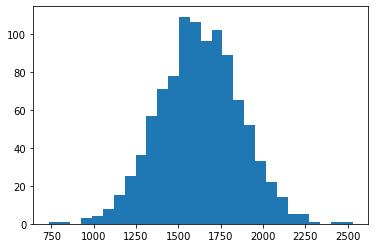

In [32]:
plt.hist(bootstrap(sample, stat_function=np.sum),bins='auto')
plt.show()

In [41]:
datadf['Tipster'].unique().size

31

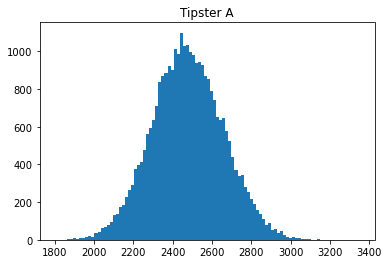

Tipster A bootstrap confidence intervals: 1912.696, 3097.183


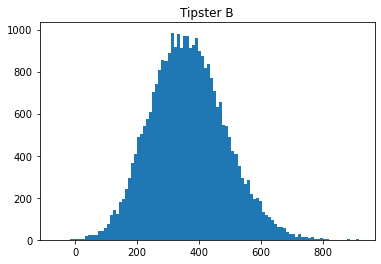

Tipster B bootstrap confidence intervals: 14.580, 838.235


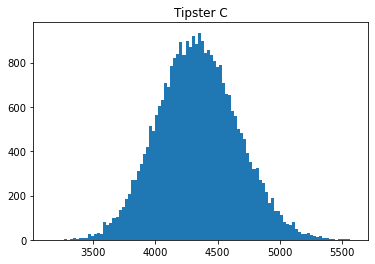

Tipster C bootstrap confidence intervals: 3319.780, 5464.073


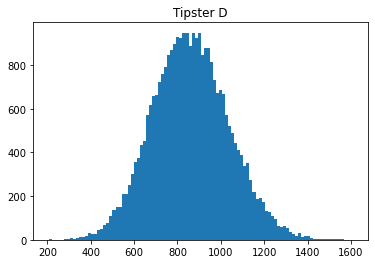

Tipster D bootstrap confidence intervals: 302.499, 1503.000


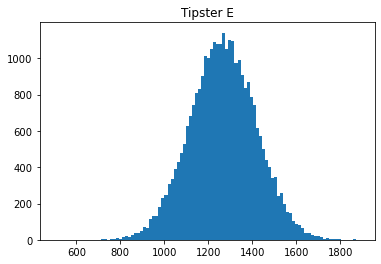

Tipster E bootstrap confidence intervals: 752.858, 1774.253


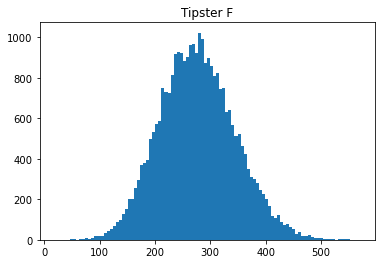

Tipster F bootstrap confidence intervals: 74.000, 522.251


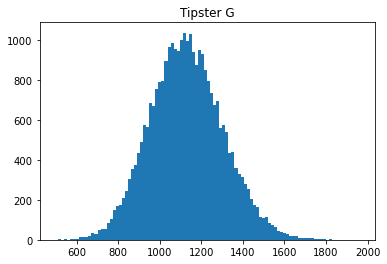

Tipster G bootstrap confidence intervals: 601.000, 1770.500


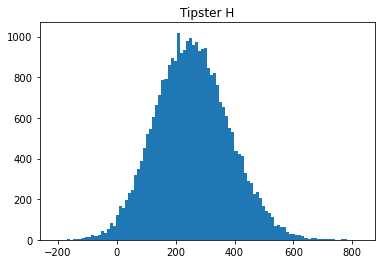

Tipster H bootstrap confidence intervals: -144.930, 686.621


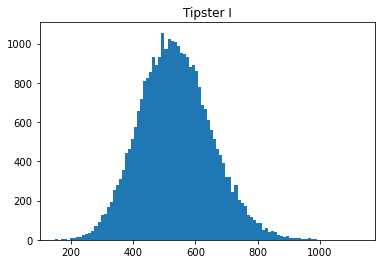

Tipster I bootstrap confidence intervals: 189.479, 983.223


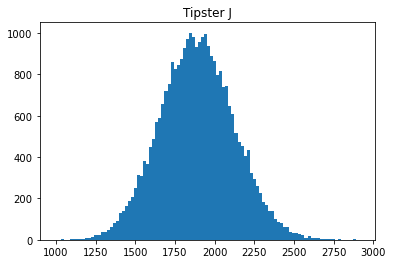

Tipster J bootstrap confidence intervals: 1151.376, 2718.982


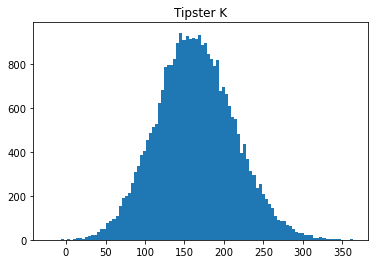

Tipster K bootstrap confidence intervals: 6.880, 331.900


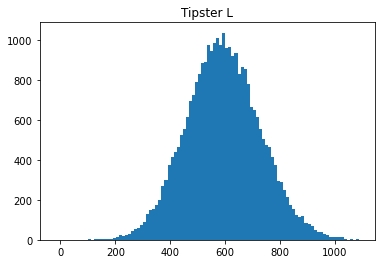

Tipster L bootstrap confidence intervals: 176.330, 1065.270


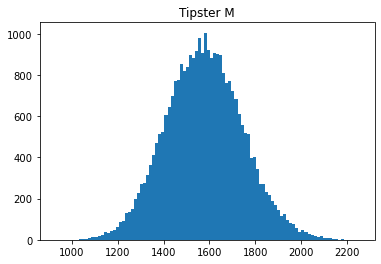

Tipster M bootstrap confidence intervals: 1067.408, 2138.732


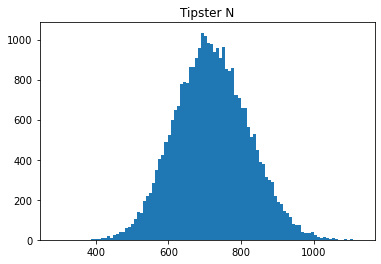

Tipster N bootstrap confidence intervals: 403.779, 1070.521


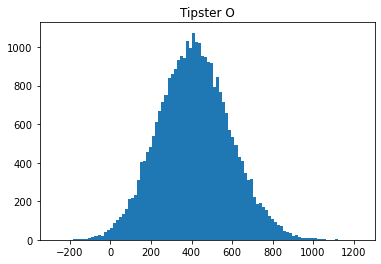

Tipster O bootstrap confidence intervals: -127.251, 1055.504


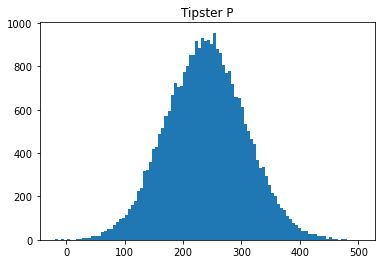

Tipster P bootstrap confidence intervals: 20.540, 485.601


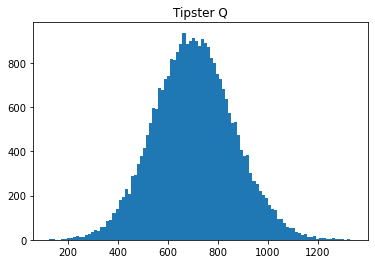

Tipster Q bootstrap confidence intervals: 187.710, 1248.610


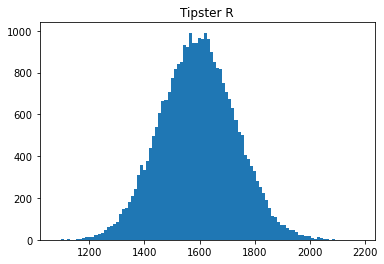

Tipster R bootstrap confidence intervals: 1147.308, 2067.701


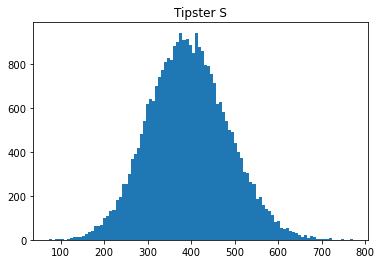

Tipster S bootstrap confidence intervals: 106.070, 728.672


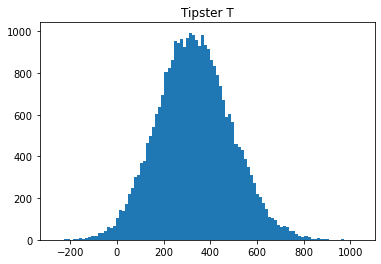

Tipster T bootstrap confidence intervals: -144.841, 905.253


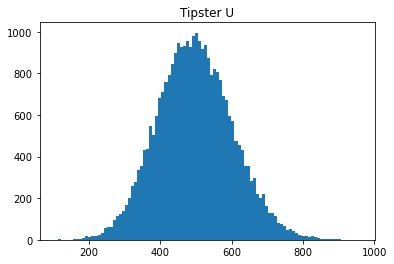

Tipster U bootstrap confidence intervals: 167.739, 873.183


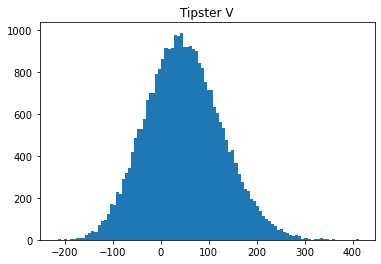

Tipster V bootstrap confidence intervals: -190.000, 323.902


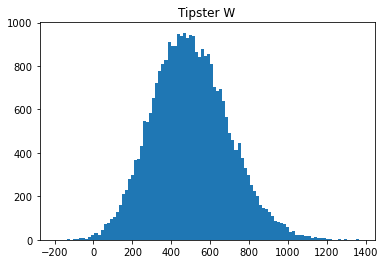

Tipster W bootstrap confidence intervals: -82.200, 1233.004


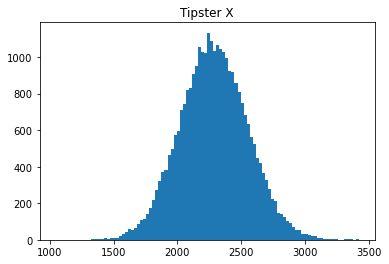

Tipster X bootstrap confidence intervals: 1424.307, 3214.562


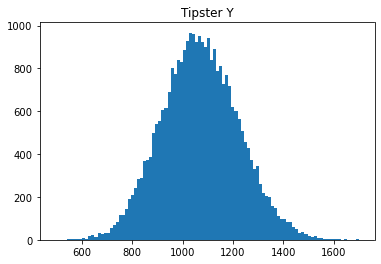

Tipster Y bootstrap confidence intervals: 570.819, 1567.110


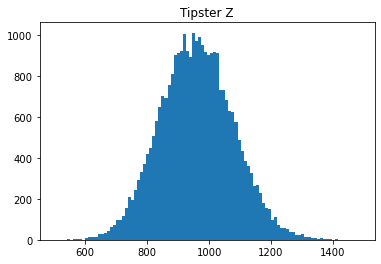

Tipster Z bootstrap confidence intervals: 593.120, 1364.823


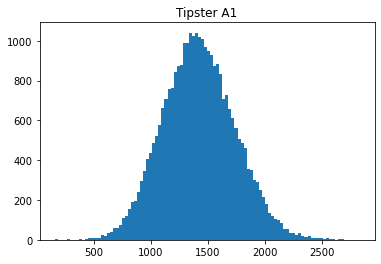

Tipster A1 bootstrap confidence intervals: 478.577, 2563.206


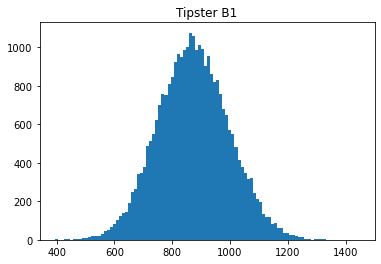

Tipster B1 bootstrap confidence intervals: 476.909, 1310.720


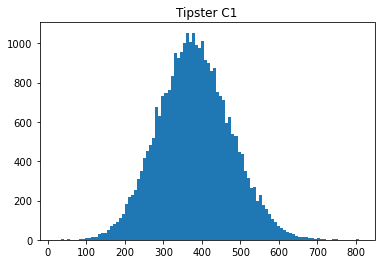

Tipster C1 bootstrap confidence intervals: 94.940, 709.010


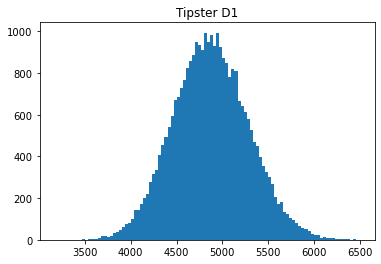

Tipster D1 bootstrap confidence intervals: 3584.688, 6326.541


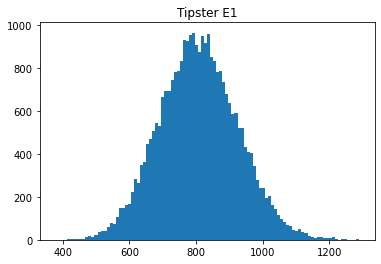

Tipster E1 bootstrap confidence intervals: 437.030, 1201.643
Number of Tipsters I would not trust : 5


In [32]:
count=0
for tipster in datadf['Tipster'].unique():
    sample = datadf[datadf['Tipster']==tipster]['Result_cost']
    plt.hist(bootstrap(sample, stat_function=np.sum),bins=100)
    plt.title(tipster)
    plt.show()
    low,high = bootstrap_ci(bootstrap(sample,stat_function=np.sum),ci=99.92)
    if low <= 0:
        count += 1
    print(f"{tipster} bootstrap confidence intervals: {low:.3f}, {high:.3f}")
print(f"Number of Tipsters I would not trust : {count}")

In [ ]:
#I want to be 95% confident that I can trust a tipster's tips to win money at a Horse Race
#max 5% Type I Error rate across 31 tests (Bootstrap Hypothessis Testing)
# 0.05/31 'Bonferroni Correction (google this)' ~ 99.92 = confidence level
#Results of Testing: I would not trust 12 out of 31 tipsters from this test = 38.7%
#not enough evidence to support that ~40% of tipsters have skill 
#Conclusion: bet at your own risk, and pick tipsters at your own risk!

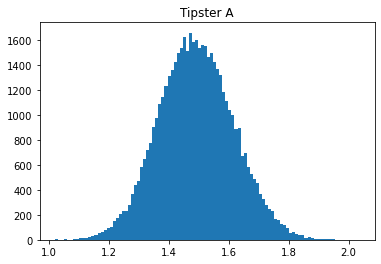

Tipster A bootstrap confidence intervals: 1.095, 1.925


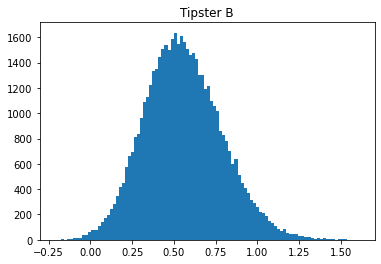

Tipster B bootstrap confidence intervals: -0.103, 1.414


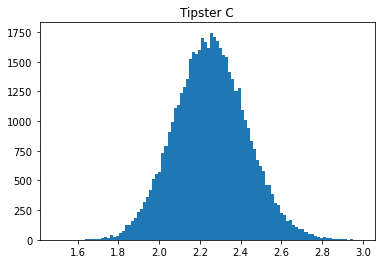

Tipster C bootstrap confidence intervals: 1.672, 2.877


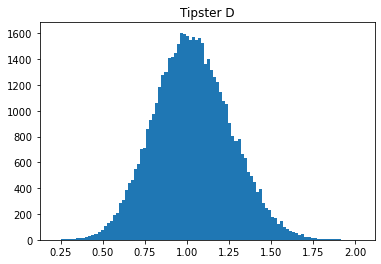

Tipster D bootstrap confidence intervals: 0.320, 1.861


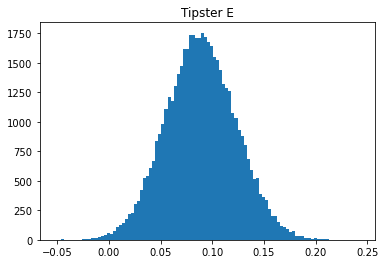

Tipster E bootstrap confidence intervals: -0.021, 0.203


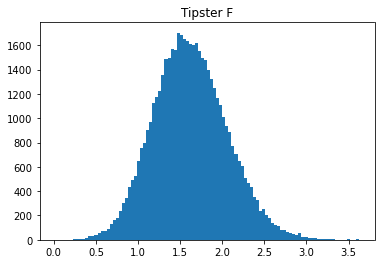

Tipster F bootstrap confidence intervals: 0.363, 3.265


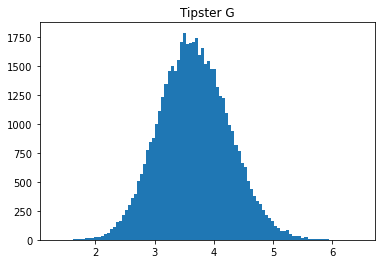

Tipster G bootstrap confidence intervals: 1.841, 5.774


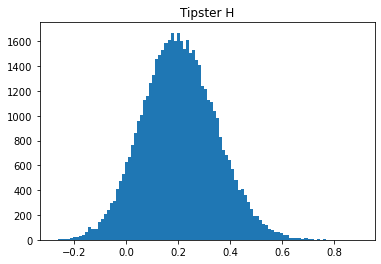

Tipster H bootstrap confidence intervals: -0.226, 0.719


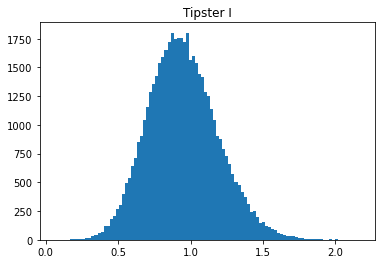

Tipster I bootstrap confidence intervals: 0.245, 1.893


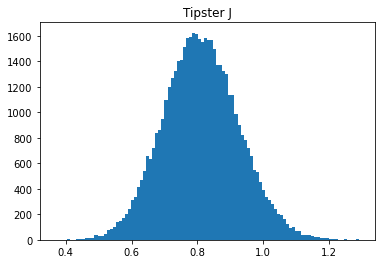

Tipster J bootstrap confidence intervals: 0.457, 1.211


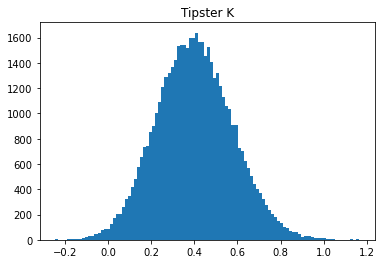

Tipster K bootstrap confidence intervals: -0.139, 1.028


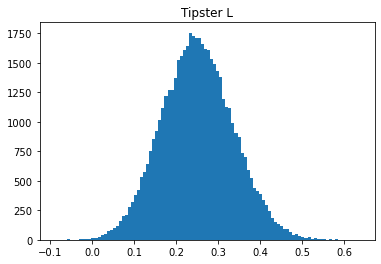

Tipster L bootstrap confidence intervals: -0.024, 0.548


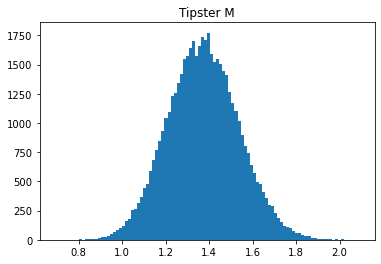

Tipster M bootstrap confidence intervals: 0.860, 1.955


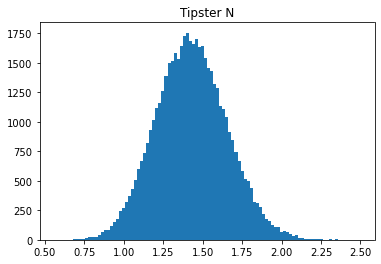

Tipster N bootstrap confidence intervals: 0.737, 2.223


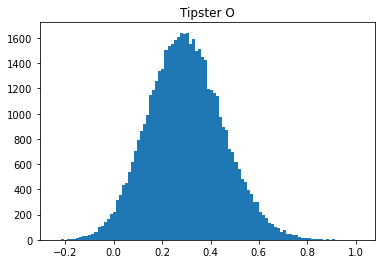

Tipster O bootstrap confidence intervals: -0.171, 0.857


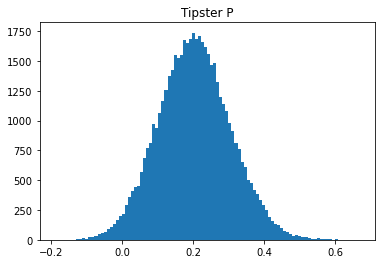

Tipster P bootstrap confidence intervals: -0.116, 0.560


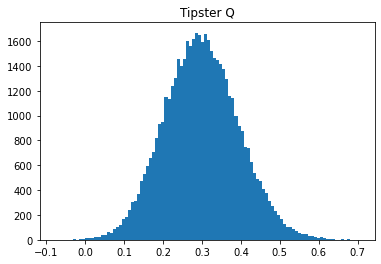

Tipster Q bootstrap confidence intervals: -0.006, 0.630


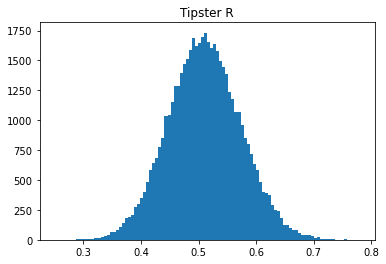

Tipster R bootstrap confidence intervals: 0.305, 0.729


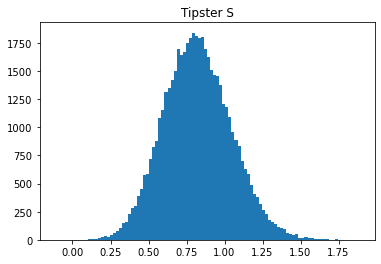

Tipster S bootstrap confidence intervals: 0.165, 1.622


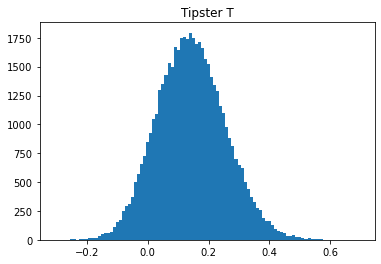

Tipster T bootstrap confidence intervals: -0.206, 0.553


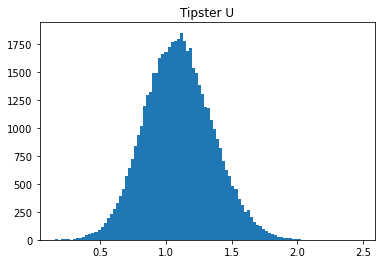

Tipster U bootstrap confidence intervals: 0.309, 1.994


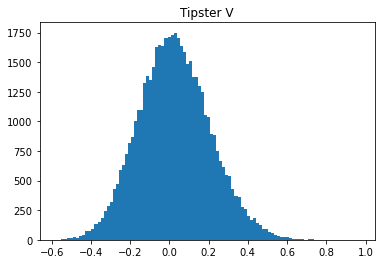

Tipster V bootstrap confidence intervals: -0.511, 0.673


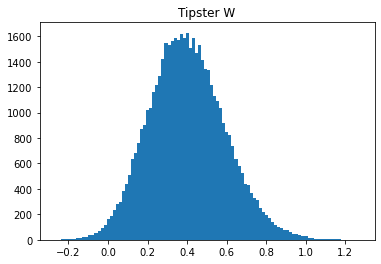

Tipster W bootstrap confidence intervals: -0.161, 1.116


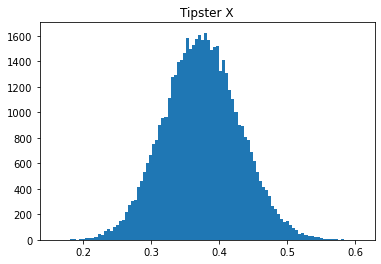

Tipster X bootstrap confidence intervals: 0.197, 0.567


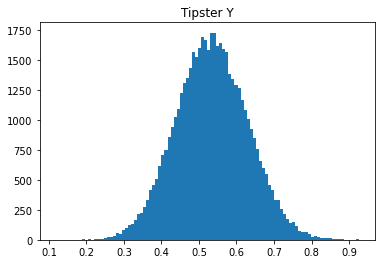

Tipster Y bootstrap confidence intervals: 0.235, 0.860


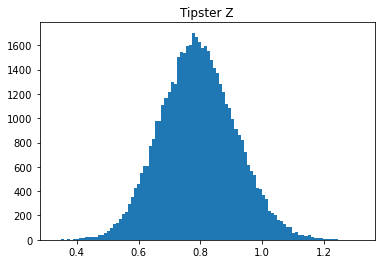

Tipster Z bootstrap confidence intervals: 0.408, 1.212


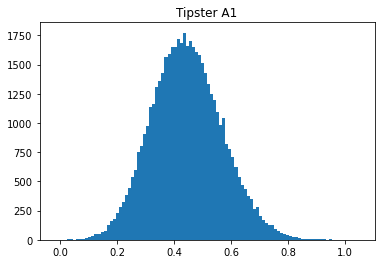

Tipster A1 bootstrap confidence intervals: 0.063, 0.906


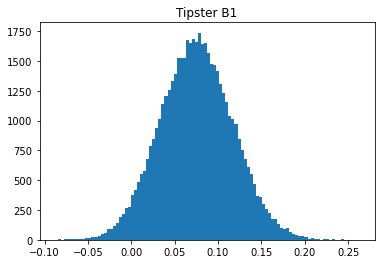

Tipster B1 bootstrap confidence intervals: -0.063, 0.224


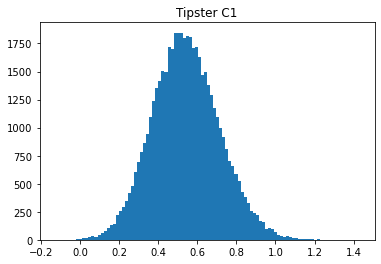

Tipster C1 bootstrap confidence intervals: 0.008, 1.154


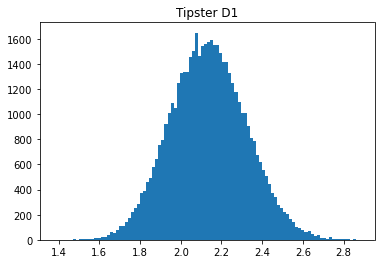

Tipster D1 bootstrap confidence intervals: 1.560, 2.782


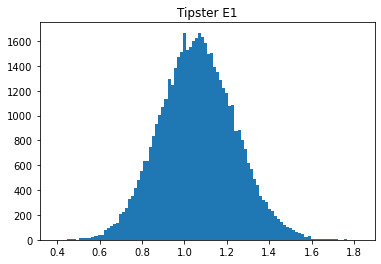

Tipster E1 bootstrap confidence intervals: 0.503, 1.680
Number of Tipsters I would not trust : 12


In [52]:
count = 0
cilst = []
for tipster in datadf['Tipster'].unique():
    sample = datadf[datadf['Tipster']==tipster]['Result_cost']
    plt.hist(bootstrap(sample, seed=123, n_bootstrap=50000),bins=100,)
    plt.title(tipster)
    plt.savefig(f"{tipster}_results.png")
    plt.show()
    low,high = bootstrap_ci(bootstrap(sample,seed=123,n_bootstrap=50000),ci=99.92)
    cilst.append((low,high))
    if low <= 0:
        count += 1
    print(f"{tipster} bootstrap confidence intervals: {low:.3f}, {high:.3f}")
    
print(f"Number of Tipsters I would not trust : {count}")

In [51]:
pd.DataFrame(data=cilst, columns=['lower','higher'])

,lower,higher
0,1.095063,1.925420
1,-0.103142,1.414358
2,1.671899,2.877297
3,0.319838,1.860999
4,-0.021306,0.203062
5,0.363010,3.265411
6,1.841378,5.774143
7,-0.226448,0.718583
8,0.244568,1.893202
9,0.456892,1.211131
